In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd   /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 11.3 MB/s eta 0:00:00


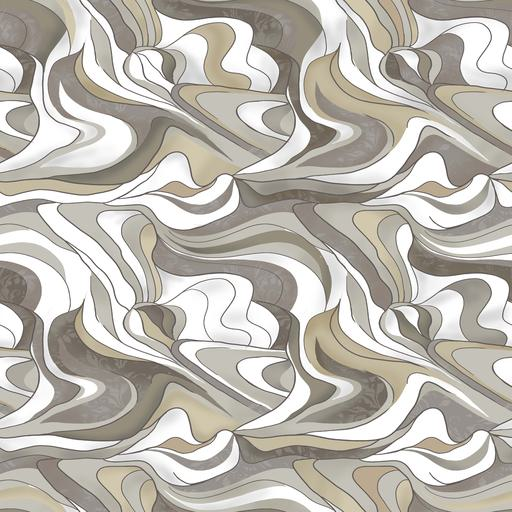

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/abstract (1).jpg"
image = Image.open(image_url)
image

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [ ]:
max_new_tokens = 200
# prompt = "USER: <image>\nWhat are the things I should be cautious about when I visit this place?\nASSISTANT:"


prompt = """USER: <image>\n Based on the following details generate description for provided image
        Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
        Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
        Style: Note artistic influences or styles (e.g., Art Deco, modern).
        Mood: Describe the emotional tone (e.g., soothing, energetic).
        Category: Classify the pattern.
        Uniqueness: Highlight distinctive features.
        provide the output in way that we can use that description to generate an image with image generation models It should be less than 80 tokens.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
 Based on the following details generate description for provided image
        Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
        Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
        Style: Note artistic influences or styles (e.g., Art Deco, modern).
        Mood: Describe the emotional tone (e.g., soothing, energetic).
        Category: Classify the pattern.
        Uniqueness: Highlight distinctive features.
        provide the output in way that we can use that description to generate an image with image generation models It should be less than 80 tokens.

ASSISTANT: The image features a white and gray patterned wallpaper with a mix of geometric and abstract shapes. The primary colors are white and gray, with some brown accents. The style is modern, and the mood is soothing. The pattern is unique and eye-catching, making it a great choice for a living space.


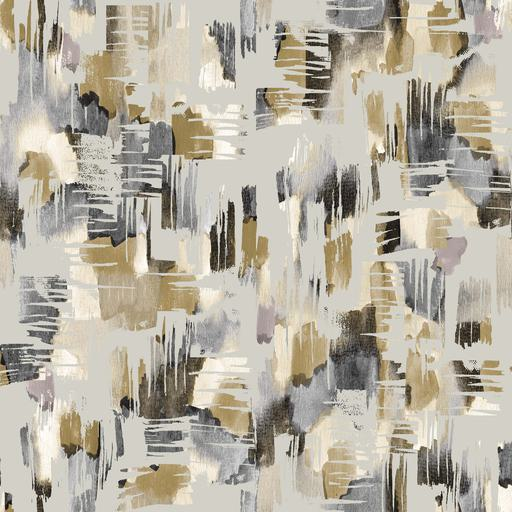

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/abstract (3).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to create an image.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image 
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to create an image.

ASSISTANT: The image features a unique and artistic design with a combination of geometric and abstract elements. The primary colors are a mix of grays, browns, and beiges, creating a warm and earthy tone. The style of the pattern is reminiscent of a modern art piece, with a focus on texture and intricate details. The pattern is composed of irregular shapes and lines, creating a sense of depth and complexity. The overall mood o

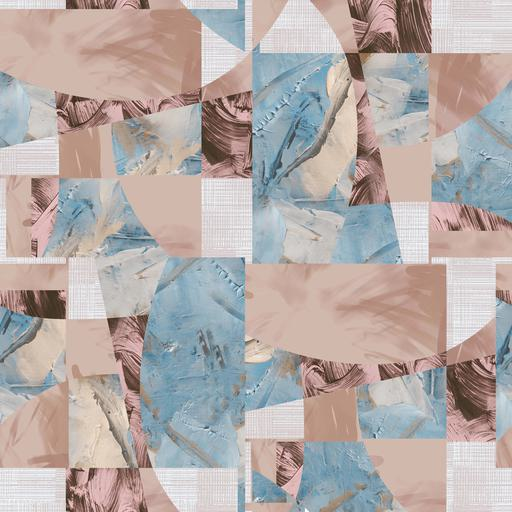

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/abstract (3).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to create an image.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image 
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to create an image.

ASSISTANT: The image features a unique and intricate pattern, with a combination of geometric and abstract shapes. The primary colors in the pattern are blue and pink, creating a visually appealing contrast. The style of the pattern is reminiscent of Art Deco, with a modern twist. The mood of the image is energetic and vibrant, capturing the viewer's attention. The pattern is classified as a geometric design, with a distinctive

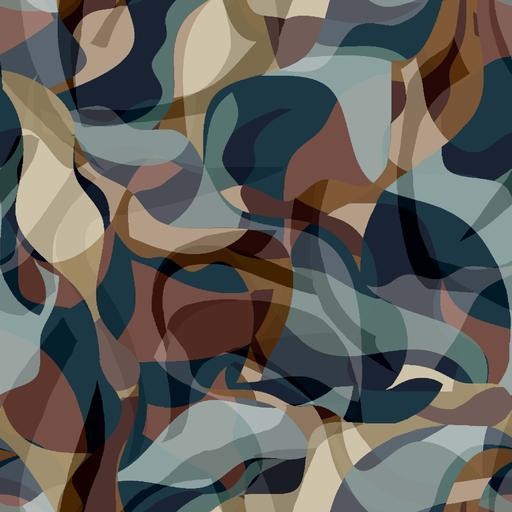

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/abstract (13).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to create an image.

ASSISTANT: The image features a colorful and intricate pattern, with a mix of blue, brown, and orange hues. The pattern is composed of various shapes and lines, creating a visually engaging and unique design. The style of the pattern can be described as abstract, with a focus on geometric shapes and textures. The mood of the image is energetic and vibrant, evoking a sense of movement and dynamism. The pattern can be classified a

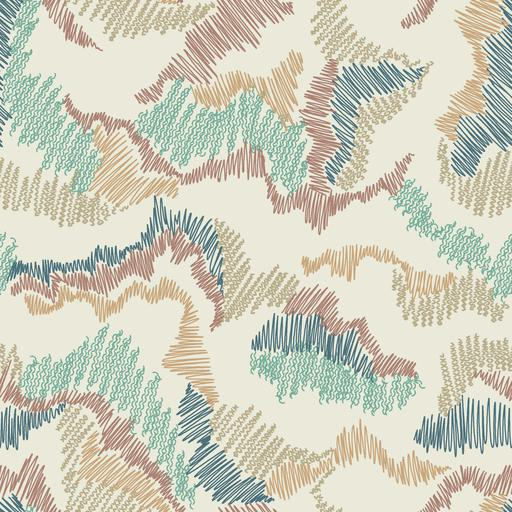

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/abstract (14).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a colorful, geometric pattern with a mix of blue, green, and orange hues. The pattern is composed of various shapes and lines, creating a visually engaging and unique design. The style of the pattern can be described as modern and abstract, with a focus on geometric shapes and intricate details. The mood of the image is energetic and vibrant, with the colors and patter

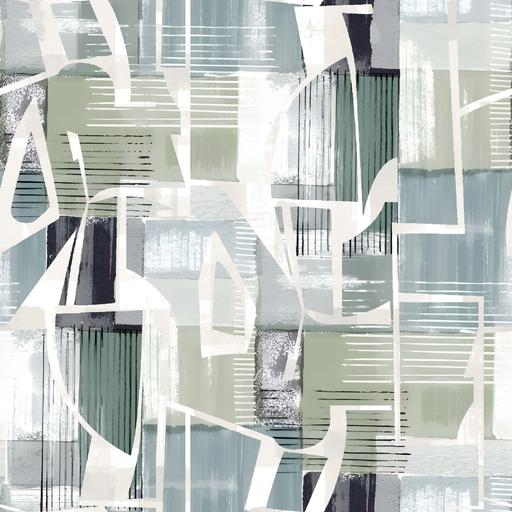

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/abstract (18).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a colorful and abstract design with a mix of geometric and abstract shapes. The primary colors include blue, green, and white, creating a vibrant and lively atmosphere. The style of the design can be described as modern, with a touch of Art Deco influence. The mood of the image is energetic and lively, with the various shapes and colors creating a sense of movement and

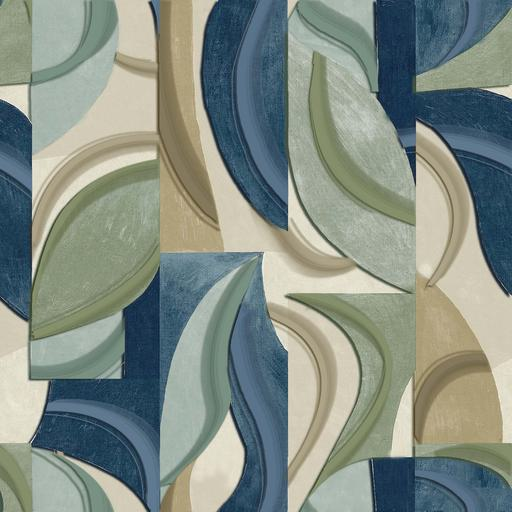

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/abstract (23).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a blue and green tile pattern with a variety of shapes and textures. The tiles are arranged in a visually appealing manner, creating a harmonious and cohesive design. The primary colors in the image are blue and green, with some secondary colors such as white and brown. The style of the pattern can be described as modern and abstract, with a focus on geometric shapes a

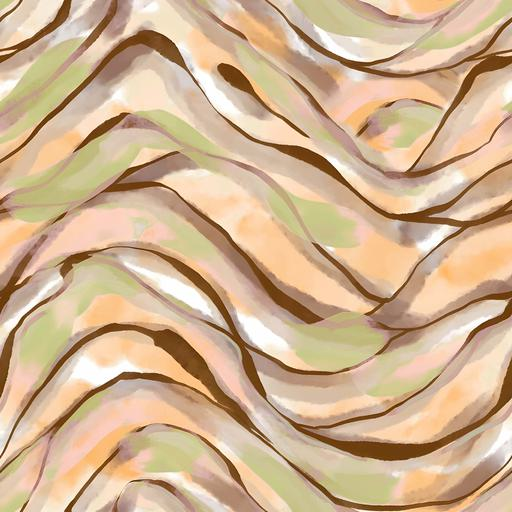

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/floral (11).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a zebra print with a mix of brown, green, and white colors. The pattern is a combination of geometric and abstract shapes, creating a unique and eye-catching design. The style of the print is reminiscent of Art Deco, giving it a bold and modern feel. The mood of the image is energetic and lively, with the vibrant colors and intricate patterns capturing the viewer's att

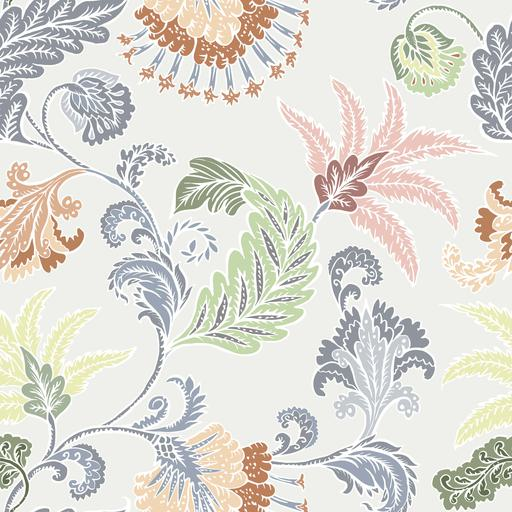

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/floral (11).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a floral pattern with a mix of green, orange, and blue colors. The design is intricate and detailed, with a variety of shapes and lines that create a visually appealing and unique pattern. The colors are harmonious, with the green and blue tones complementing the warm orange hues. The style of the pattern is reminiscent of Art Deco, with its geometric shapes and bold l

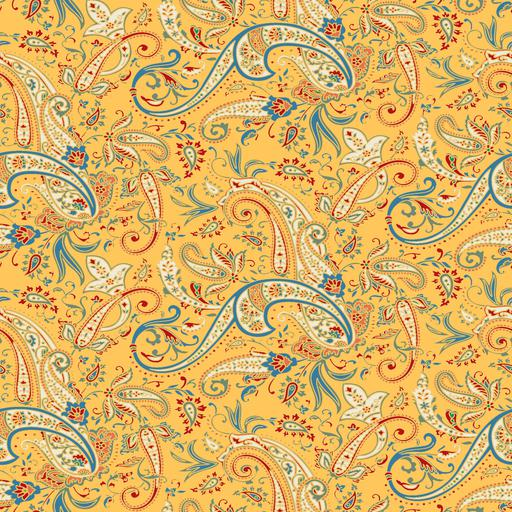

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/paisley (7).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a yellow background with a blue and red floral pattern. The pattern consists of various shapes, lines, and textures, creating a visually appealing and unique design. The colors used in the pattern are predominantly blue and red, with some yellow accents. The style of the pattern can be described as abstract, with a touch of Art Deco influence. The mood of the image is 

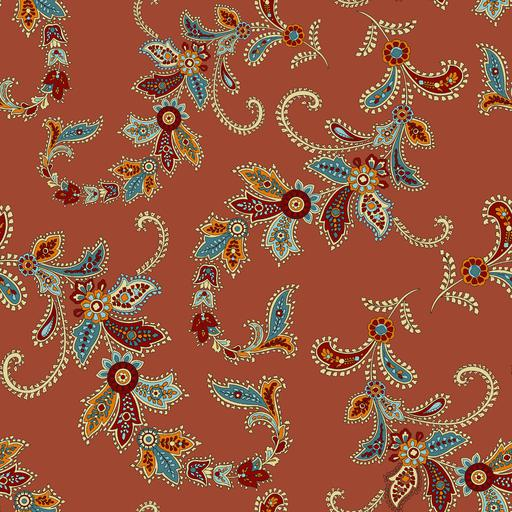

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/paisley (11).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a red and blue floral pattern with a mix of geometric and abstract shapes. The primary colors are red and blue, with some secondary colors like orange and green. The style of the pattern is reminiscent of Art Deco, giving it a modern and unique appearance. The mood of the image is energetic and vibrant, with the bold colors and intricate patterns creating a lively atmo

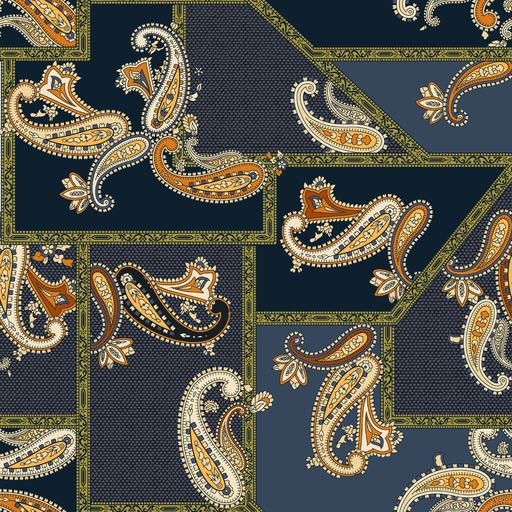

In [ ]:
import requests
from PIL import Image

image_url = "/content/drive/MyDrive/resize_images/paisley (17).jpg"
image = Image.open(image_url)
image

In [ ]:
max_new_tokens = 200
prompt = """USER: <image>\n Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.
\nASSISTANT:"""
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]["generated_text"])

USER:  
 Based on the following deatils generate description for provided image
Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
Style: Note artistic influences or styles (e.g., Art Deco, modern).
Mood: Describe the emotional tone (e.g., soothing, energetic).
Category: Classify the pattern.
Uniqueness: Highlight distinctive features.
provide the output in way that we can use that description to generate an image with stable difussion method.

ASSISTANT: The image features a blue and gold paisley patterned fabric with a geometric design. The fabric is adorned with intricate patterns and shapes, including swirls and curlicues. The colors in the fabric are predominantly blue and gold, creating a visually appealing and elegant appearance. The style of the fabric can be described as modern and artistic, with a touch of sophistication. The mo

# 100 Images

In [ ]:
import os
import random
import pandas as pd
from transformers import pipeline
from PIL import Image
from tqdm import tqdm
import torch
import gc

In [ ]:
# Initialize the pipeline
model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id, device=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [ ]:
# Function to generate description for an image
def generate_description(image_path):
    try:
        image = Image.open(image_path)
        prompt = """USER: <image>\n Based on the following details generate description for provided image
        Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).
        Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).
        Style: Note artistic influences or styles (e.g., Art Deco, modern).
        Mood: Describe the emotional tone (e.g., soothing, energetic).
        Category: Classify the pattern.
        Uniqueness: Highlight distinctive features.
        provide the output in way that we can use that description to generate an image with image generation models It should be less than 80 tokens.
        \nASSISTANT:"""
        outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
        description = outputs[0]["generated_text"]
        image.close()
        torch.cuda.empty_cache()
        gc.collect()
        return description
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [ ]:
# Set the seed for reproducibility
seed = 42
random.seed(seed)

# Define the directory containing images
image_directory = "/content/drive/MyDrive/abstract_2024-05-09_0519"
all_images = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
# Randomly select 100 images
selected_images = random.sample(all_images, 100)

# Create a DataFrame to store image names and descriptions
df = pd.DataFrame(columns=["Image Name", "Description"])

In [ ]:
len(selected_images)

100

In [ ]:
# Create a list to store dictionaries of image names and descriptions
data = []

# Iterate over the selected images and generate descriptions
for image_path in tqdm(selected_images, desc="Processing Images"):
    description = generate_description(image_path)
    if description:
        data.append({"Image Name": os.path.basename(image_path), "Description": description})



Processing Images:  10%|█         | 10/100 [00:42<05:55,  3.95s/it]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Processing Images: 100%|██████████| 100/100 [05:46<00:00,  3.46s/it]


In [ ]:
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

In [ ]:
df['Description'][0]

'USER:  \n Based on the following details generate description for provided image\n        Visuals: Detail key elements like shapes, lines, and textures, specifying the type (e.g., geometric, abstract).\n        Colors: Describe primary and secondary colors, and any thematic palette (e.g., pastels).\n        Style: Note artistic influences or styles (e.g., Art Deco, modern).\n        Mood: Describe the emotional tone (e.g., soothing, energetic).\n        Category: Classify the pattern.\n        Uniqueness: Highlight distinctive features.\n        provide the output in way that we can use that description to generate an image with image generation models It should be less than 80 tokens.\n        \nASSISTANT: The image features a pattern with a mix of brown and white colors. The pattern is a combination of geometric shapes and abstract lines, creating a visually interesting and unique design. The mood of the image is energetic and modern, with a touch of artistic influence. The pattern 

In [ ]:


# Save the DataFrame to a CSV file
output_csv_path = "/content/drive/MyDrive/image_descriptions2.csv"
df.to_csv(output_csv_path, index=False)
print(f"Descriptions saved to {output_csv_path}")


Descriptions saved to /content/drive/MyDrive/image_descriptions2.csv


In [ ]:
# Optional: Print a sample of the DataFrame
df.head()

Image Name                                        Description
0   5030930-5.jpg  USER:  \n Based on the following details gener...
1  50310112-4.jpg  USER:  \n Based on the following details gener...
2     4031065.jpg  USER:  \n Based on the following details gener...
3  10301077-2.jpg  USER:  \n Based on the following details gener...
4   5031120-4.jpg  USER:  \n Based on the following details gener...

In [ ]:
import pandas as pd

# Read the CSV file
input_csv_path = "/content/drive/MyDrive/image_descriptions2.csv"
df = pd.read_csv(input_csv_path)

# Function to extract the "ASSISTANT" part of the description
def extract_assistant_part(description):
    assistant_start = description.find("ASSISTANT:") + len("ASSISTANT:")
    return description[assistant_start:].strip()

# Apply the function to the 'Description' column
df['Description'] = df['Description'].apply(extract_assistant_part)

# Save the updated DataFrame to a new CSV file
output_csv_path = "/content/drive/MyDrive/short_description_LLava_model.csv"
df.to_csv(output_csv_path, index=False)
print(f"Cleaned descriptions saved to {output_csv_path}")

# Optional: Print a sample of the DataFrame
print(df.head())


Cleaned descriptions saved to /content/drive/MyDrive/short_description_LLava_model.csv
       Image Name                                        Description
0   5030930-5.jpg  The image features a pattern with a mix of bro...
1  50310112-4.jpg  Abstract, geometric patterns with blue and gre...
2     4031065.jpg  The image is a collage of various patterns and...
3  10301077-2.jpg  The image is a blue and white painting with a ...
4   5031120-4.jpg  Abstract art with green and purple tones, feat...


In [ ]:
df['Description'][99]

'The image features a camouflage pattern with a mix of grays and greens. The pattern is composed of irregular shapes and lines, creating a unique and eye-catching design. The mood of the image is energetic and adventurous, as the camouflage pattern is often associated with the military and outdoor activities. The style of the pattern is abstract, with a focus on the interplay between shapes and lines. The primary colors in the image are gray and green, with a secondary color palette that includes other shades of green and brown. The pattern is distinctive and can be classified as a geometric camouflage.'